# Realty market research for St. Pietersburg.

The data set for this research is the Yandex.Realty archive of ads for the apartments sal in St. Petersburg and neighboring settlements. 

The main goal of this research is to understand what affects the realty prices. The outcome of the research will be used to build an automated system that will track anomalies and fraudulent activity.

There are two types of data available for each apartment for sale. The first type is the data that was entered by the user, the second type is the data that obtained automatically based on cartography. For example, the distance to the center, airport, nearest park and so on.

The table contains the following data:

* 'airports_nearest` — distance to the nearest airport in meters (m)
* 'balcony` — number of balconies
* 'ceiling_height` — ceiling height (m)
* 'cityCenters_nearest` - distance to the city center (m)
* 'days_exposition` — how many days the ad was placed (from publication to removal)
* 'first_day_exposition` — date of publication
* 'floor` - floor
* 'floors_total` — total floors in the house
* 'is_apartment` - apartments (boolean type)
* 'kitchen_area` — kitchen area in square meters (m2)
* 'last_price` - price at the time of withdrawal from publication
* 'living_area` — living area in square meters(m2)
* 'locality_name` — name of the locality
* 'open_plan` — free layout (boolean type)
* 'parks_around3000` — the number of parks within a 3 km radius
* 'parks_nearest` — distance to the nearest park (m)
* 'ponds_around3000` — number of reservoirs within a radius of 3 km
* 'ponds_nearest` — distance to the nearest reservoir (m)
* 'rooms` — number of rooms
* 'studio` — studio apartment (boolean type)
* 'total_area` — the area of the apartment in square meters (m2)
* 'total_images` — the number of photos of the apartment in the ad

The research includes the following stages:

1. Data investigation.
2. Data cleanup.
3. Data analysis.
4. Follow up.

# Data investigation

First thing to do is to load tha data and check it's shape.

In [77]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
# libraries import
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
!pip install pymystem3==0.1.10
from pymystem3 import Mystem
m = Mystem()
from matplotlib import pyplot as plt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
# data import
df = pd.read_csv("/content/drive/MyDrive/da_portfolio/real_estate_data.csv", sep="\t") 
display(df.head(10))
display(df.info())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

Now the data is loaded and I can see that not all data can be used for analysis the way it is now: the number of rows in columns is not equal, some cells have `NaN` as a value, also there is a need to check the data for duplicates. 





# Data cleanup

I will start with checking for duplicates.

In [80]:
# converting locality to the lowercase
df["locality_name"] = df["locality_name"].str.lower()

# checking for duplicates in the wholde dataframe
print("The number of duplicates is:", df.duplicated().sum())

The number of duplicates is: 0


Now that I've confirmed the absence of duplicates, I can proceed with the data cleanup process. My next task is to address any discrepancies in the number of rows and columns.

Usually, an unequal number of rows indicates that some cells lack the appropriate data. To resolve this, I will assess the number of such cells per row and examine the column names to ensure that everything is in order.

In [81]:
# checking the columns' names
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

No spaces, no camelcase. All fine.

In [82]:
# checking the amount of  null in the column
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Upon closer inspection, it appears that the dataset contains a significant number of null values - almost every column has some. At this point, I must determine how to handle these values, beginning with identifying which columns will be necessary for further analysis.

Based on my initial assessment, it seems that the following columns will be required:

* `ceiling_height`
* `floors_total`
* `locality_name`
* `cityCenters_nearest`
* `days_exposition`
* `living_area`
* `kitchen_area`

So I will run the data cleanup only on them, avoiding doing anything to the other columns.


**Ceiling height** (`ceiling_height`): it should be noted that the current standard for new and old buildings alike is approximately 2.5 to 2.8 meters. However, there is an exception for "stalinka" buildings, where the ceiling height can exceed 3 meters. Unfortunately, since the table does not provide any information on the type or year of construction, there is no way to determine which category the gaps belong to. As a result, the median value of the `ceiling_height` category will be utilized to fill in these gaps.


In [83]:
# checking the median value
print("The median is:", df["ceiling_height"].median(), "meters")

The median is: 2.65 meters


In [84]:
# filling the gaps with median value
df["ceiling_height"].fillna((df["ceiling_height"].median()), inplace=True)

**Total floors in the house** (`floors_total`): it should be noted that filling in the gaps for this column requires information on the year or type of construction. Additionally, the presence of the `floor` parameter further complicates the task: while the `floors_total` gap can be filled with a median value of 9, the `floor` column may indicate that the client lives on the 13th floor, for example.

To simplify this process, I've calculated the percentage of omissions in the `floors_total` column, which amounts to only 0.36% of the total number of rows. Therefore, it should be safe to delete the rows with missing values.

In order to facilitate the use of certain functions on the column values, I will need to change the data type to numeric.


In [85]:
# deleting NaN
df = df.dropna(subset=["floors_total"])

# changing the cityCenters_nearest datatype to 'int'
df["floors_total"] = df["floors_total"].astype("int")


**The name of the locality** (`locality_name`): the number of rows with gaps is relatively small. Unfortunately, there are no parameters available to use for filling in these gaps. As a result, it will be necessary to delete the rows with missing values.


In [86]:
# deleting NaN
df = df.dropna(subset=["locality_name"])

**Proximity to the center** (`citycenter_nearest`): measures proximity to the center, contains gaps in the data due to its inapplicability to certain settlements. For instance, some small villages and towns do not have a defined "city center", as there is little distinction between the outskirts and the center, and distance from the center does not affect property prices in these areas.

However, for towns and villages that are satellite settlements of a larger city, it may be possible to indicate the distance from the main city center instead of the settlement center itself.


In [87]:
# I start with the list of the settlments
df["locality_name"].unique()

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '

In [88]:
# checking the amount of items in each category
df["locality_name"].value_counts()

санкт-петербург                    15651
посёлок мурино                       520
посёлок шушары                       439
всеволожск                           398
пушкин                               369
                                   ...  
поселок каложицы                       1
посёлок платформа 69-й километр        1
поселок почап                          1
поселок гончарово                      1
посёлок дзержинского                   1
Name: locality_name, Length: 364, dtype: int64

Although the dataset contains many settlements, some of them only have one value associated with them. Additionally, from the settlement names, it is clear that the majority of them are located in the vicinity of Saint Petersburg. The size of each settlement can be inferred from its name, with categories ranging from "village" to "settlement" to "urban-type settlement". For cities, no such distinctions are necessary, and they are simply identified by their names.

To facilitate analysis of the data, I plan to extract only the locality names and apply lemmatization to categorize them appropriately. 


In [89]:
# lemmatization with categorizing function
def lemm(liveplace):
    lemma = ' '.join(m.lemmatize(liveplace))
    if "поселок город тип" in lemma:
        return lemma.replace("посёлок город тип", '')
    elif "деревня" in lemma:
        return lemma.replace("деревня", '')
    elif "поселок" in lemma:
        return lemma.replace("поселок", '')
    elif "село" in lemma:
        return lemma.replace("село", '')
    elif "товарищество" in lemma:
         return lemma.replace("товарищество", '')
    else:
        pass
    return lemma

# applying to the df and add the result to locality_name_lem
df["locality_name_lem"] = df["locality_name"].apply(lemm)


In [90]:
# checking the results
df["locality_name_lem"].value_counts()

санкт-петербург \n                     15651
   муриный \n                            552
   шушары \n                             439
всеволожск \n                            398
пушкин \n                                369
                                       ...  
   пельгора \n                             1
   каложица \n                             1
   платформа   69 - й   километр \n        1
   почап \n                                1
   дзержинский \n                          1
Name: locality_name_lem, Length: 325, dtype: int64

Data check by category.

In [91]:
# data check by category
df.groupby("locality_name_lem")["cityCenters_nearest"].agg([min, max, sum])

,min,max,sum
locality_name_lem,,,
агалатово \n,NaN,NaN,0.0
александровский \n,27352.0,27584.0,54936.0
алексеевка \n,NaN,NaN,0.0
аннино \n,NaN,NaN,0.0
аро \n,NaN,NaN,0.0
...,...,...,...
сосновый бор \n,NaN,NaN,0.0
сясьстрой \n,NaN,NaN,0.0
тихвин \n,NaN,NaN,0.0


Upon examining the table, it becomes evident that gaps in the data are primarily related to smaller settlements that do not have a defined `distance` parameter from the center. For larger cities, such as St. Petersburg and Pavlovsk, the `distance` parameter is available.

The `sum` column indicates that for certain categories, there is no data available for the entire category, making it impossible to calculate a median value.

Filling in the median value for the entire column is not a viable solution, as in some cases the median value may exceed the settlement diameter.

Fortunately, the percentage of rows with missing values in this column amounts to only 1.3% of the total number of rows. As such, it is more convenient to delete the rows with missing values for the sake of future analysis.


In [92]:
# deleting the null values
df.dropna(subset=["cityCenters_nearest"], inplace=True)

#checking the duplicates
print("The number of duplicates is:", df["cityCenters_nearest"].isnull().sum())

The number of duplicates is: 0


**Ad placement period** (`days_exposition`) is affected by still active ads or ads that have been published for less than a day. Therefore, I am unable to fill these gaps with zeros or any other value. While the presence of these gaps may affect the analysis, I choose to delete them from the table to avoid any misinterpretation. 



In [93]:
# deleting the null values
df['days_exposition'] = df['days_exposition'].dropna()

**Living area** (`living_area`) column indicates the total area of rooms that are intended for living. To fill the gaps in this column, I will investigate the correlation between the living area of other apartments (with no gaps) and the number of rooms they have. After analyzing the data, I will fill in the gaps with the median value to ensure consistency in the data.


In [94]:
# checking the number of rooms
df['rooms'].value_counts().to_frame()

,rooms
2,5888
1,5852
3,4667
4,1051
5,300
0,117
6,101
7,57
8,12
9,8


The data shows that 0.2% of rooms have a count of 0, while 2% of the total number of rooms are apartments with 5 or more rooms. It appears that some mistakes may have occurred during data collection. For example, 0 may indicate studio apartments where the living room is combined with the kitchen, while someone may have mistakenly counted the toilet, kitchen, and other areas as "rooms," resulting in many 5+ room apartments. Alternatively, someone may be selling an entire multi-story house. 

Although the amount of such data is not statistically significant, it can be considered outliers. Therefore, I have chosen to remove this data to avoid difficulties during further analysis. 



In [95]:
# removing all lines with rooms more than 5
df = df.drop(df[df.rooms >= 5].index)

# removing all lines with rooms  0
df = df.drop(df[df.rooms == 0].index)

# replacing with median by 'rooms' category
df['living_area']=df.groupby('rooms')['living_area'].transform(lambda x: x.fillna(x.median()))

# updating data type to ('int')
df['living_area'] = df['living_area'].astype('int')

**Kitchen area** (`kitchen_area`) column represents the area of the kitchen and is not part of the living area. The non-living area includes the hallway, bathroom, toilet, etc. As we do not have data for all these areas, we cannot calculate the kitchen area by subtracting the living area from the total area and then subtracting the areas of the hallway, balcony, etc. Therefore, it is more convenient to fill in the missing values with the median value for the respective category.

Additionally, there are studios in the table where there may not be a kitchen at all. Therefore, I will first investigate the impact of studios on the entire table and then fill in the missing values with the median value.

In [96]:
# checking if there are any studios in the table with a specified kitchen area
df.query('studio == True and kitchen_area>=1')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_lem


There are no such studios. Let's find out how many studios are there in the table.


In [97]:
# general amount of studio apt
df["studio"].value_counts()

False    17453
True         5
Name: studio, dtype: int64

Since the number of studios is not statistically significant, I will remove them from the analysis and will not fill in missing values for this category.

In [98]:
# deleting studios
df = df.drop(df[df.studio == True].index)

# checking median
df['kitchen_area'].median()

9.5

In [99]:
# filling the gaps with median
df['kitchen_area'].fillna(df['kitchen_area'].median(), inplace=True)

# changing data type ('int')
df['kitchen_area'] = df['kitchen_area'].astype('int')

Now the data cleanup is done and I am cheking reults.

In [100]:
# are there any gaps lefrt in ceiling_height, floors_total, locality_name, cityCenters_nearest, days_expositio
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            15376
studio                      0
open_plan                   0
kitchen_area                0
balcony                  8442
locality_name               0
airports_nearest           22
cityCenters_nearest         0
parks_around3000            0
parks_nearest            9779
ponds_around3000            0
ponds_nearest            8808
days_exposition          2179
locality_name_lem           0
dtype: int64

In [101]:
# if table is visually ok
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_lem
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51,8,NaN,...,NaN,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,санкт-петербург \n
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11,18,1,NaN,...,2.0,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,шушары \n
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5,34,4,NaN,...,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,санкт-петербург \n
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14,45,9,NaN,...,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,санкт-петербург \n
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32,13,NaN,...,NaN,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,санкт-петербург \n


All looks fine, just need to adjust data type in `last_pirce` and `total_area` columns.

In [102]:
# changing the data type and cheking if everything is ok
df['last_price'] = df['last_price'].astype(int)
df['total_area'] = df['total_area'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17453 entries, 0 to 23697
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          17453 non-null  int64  
 1   last_price            17453 non-null  int64  
 2   total_area            17453 non-null  int64  
 3   first_day_exposition  17453 non-null  object 
 4   rooms                 17453 non-null  int64  
 5   ceiling_height        17453 non-null  float64
 6   floors_total          17453 non-null  int64  
 7   living_area           17453 non-null  int64  
 8   floor                 17453 non-null  int64  
 9   is_apartment          2077 non-null   object 
 10  studio                17453 non-null  bool   
 11  open_plan             17453 non-null  bool   
 12  kitchen_area          17453 non-null  int64  
 13  balcony               9011 non-null   float64
 14  locality_name         17453 non-null  object 
 15  airports_nearest   

The data is neat and clean and ready for further analysis. 

# Data analysis




## Price per sq.m

Next, I will calculate the price per square meter for each apartment and add it to the table. 
 

In [103]:
# aq.m price in sqm_price 
df['sqm_price'] = df['last_price']/df['total_area']

# changing the data type
df['sqm_price'] = df['sqm_price'].astype(int)


On the top of it it would be nice to know day of the week (dow), month and year of publication of the ad.

I will add them to the following columns:

* `dow` - day of the week
* `month` - month
* `year` - year




In [104]:
# converting date to the better format
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

# and adding columns
df['dow'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year']=df['first_day_exposition'].dt.year

# checking the results
df.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_lem,sqm_price,dow,month,year
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,NaN,...,1.0,482.0,2.0,755.0,NaN,санкт-петербург \n,120370,3,3,2019
1,7,3350000,40,2018-12-04,1,2.65,11,18,1,NaN,...,0.0,NaN,0.0,NaN,81.0,шушары \n,83750,1,12,2018
2,10,5196000,56,2015-08-20,2,2.65,5,34,4,NaN,...,1.0,90.0,2.0,574.0,558.0,санкт-петербург \n,92785,3,8,2015


All fine, now I will add the apartment floor by category:

* `1` - groud floor
* `2` - last floor
* `3` - any other floor

In [105]:
# adding floor category to  first_last column

def first_last_func(value):
    if value['floor'] == value['floors_total']:
        return "1"
    elif value['floor'] == 1:
         return "2"
    else:
        return "3"


df['first_last'] = df.apply(first_last_func, axis=1)

# and changing the data type
df['first_last'] = df['first_last'].astype(int)

Let's calculate and add the ratio of living area to total area, as well as the ratio of kitchen area to total area.


In [106]:
# ratio of living area to total area
df['living_to_total_%'] = df['living_area']/df['total_area']*100
# changing the data type to make it easier to work with
df['living_to_total_%'] = df['living_to_total_%'].astype(int)

# ratio of kitchen area to total area
df['kitchen_to_total_%'] = df['kitchen_area']/df['total_area']*100
# changing the data type to make it easier to work with
df['kitchen_to_total_%'] = df['kitchen_to_total_%'].astype(int)

Checking the result of all efforts for gaps.

In [107]:
# Checking the result
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17453 entries, 0 to 23697
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          17453 non-null  int64         
 1   last_price            17453 non-null  int64         
 2   total_area            17453 non-null  int64         
 3   first_day_exposition  17453 non-null  datetime64[ns]
 4   rooms                 17453 non-null  int64         
 5   ceiling_height        17453 non-null  float64       
 6   floors_total          17453 non-null  int64         
 7   living_area           17453 non-null  int64         
 8   floor                 17453 non-null  int64         
 9   is_apartment          2077 non-null   object        
 10  studio                17453 non-null  bool          
 11  open_plan             17453 non-null  bool          
 12  kitchen_area          17453 non-null  int64         
 13  balcony         

In [108]:
# checking the visual look and feel
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,locality_name_lem,sqm_price,dow,month,year,first_last,living_to_total_%,kitchen_to_total_%
0,20,13000000,108,2019-03-07,3,2.70,16,51,8,NaN,...,755.0,NaN,санкт-петербург \n,120370,3,3,2019,3,47,23
1,7,3350000,40,2018-12-04,1,2.65,11,18,1,NaN,...,NaN,81.0,шушары \n,83750,1,12,2018,2,45,27
2,10,5196000,56,2015-08-20,2,2.65,5,34,4,NaN,...,574.0,558.0,санкт-петербург \n,92785,3,8,2015,3,60,14
3,0,64900000,159,2015-07-24,3,2.65,14,45,9,NaN,...,234.0,424.0,санкт-петербург \n,408176,4,7,2015,3,28,5
4,2,10000000,100,2018-06-19,2,3.03,14,32,13,NaN,...,48.0,121.0,санкт-петербург \n,100000,1,6,2018,3,32,41
6,6,3700000,37,2017-11-02,1,2.65,26,10,6,NaN,...,NaN,155.0,парголовый \n,100000,3,11,2017,3,27,37
7,5,7915000,71,2019-04-18,2,2.65,24,31,22,NaN,...,NaN,NaN,санкт-петербург \n,111478,3,4,2019,3,43,25
9,18,5400000,61,2017-02-26,3,2.50,9,43,7,NaN,...,NaN,289.0,санкт-петербург \n,88524,6,2,2017,3,70,9
10,5,5050000,39,2017-11-16,1,2.67,12,20,3,NaN,...,553.0,137.0,санкт-петербург \n,129487,3,11,2017,3,51,20
11,9,3300000,44,2018-08-27,2,2.65,5,31,4,False,...,NaN,7.0,ломоносов \n,75000,0,8,2018,3,70,13



I have calculated additional data and added it to the table. Upon checking the result, there are no missing values, and visually, it's apparent that all data is filled in correctly (new columns of the table are filled with plausible data).

## Exploratory Data Analysis

It's necessary to examine the data present in the table: area, price, number of rooms, and ceiling height. For this purpose, I will use histograms.

I'll start with a histogram of the total area:

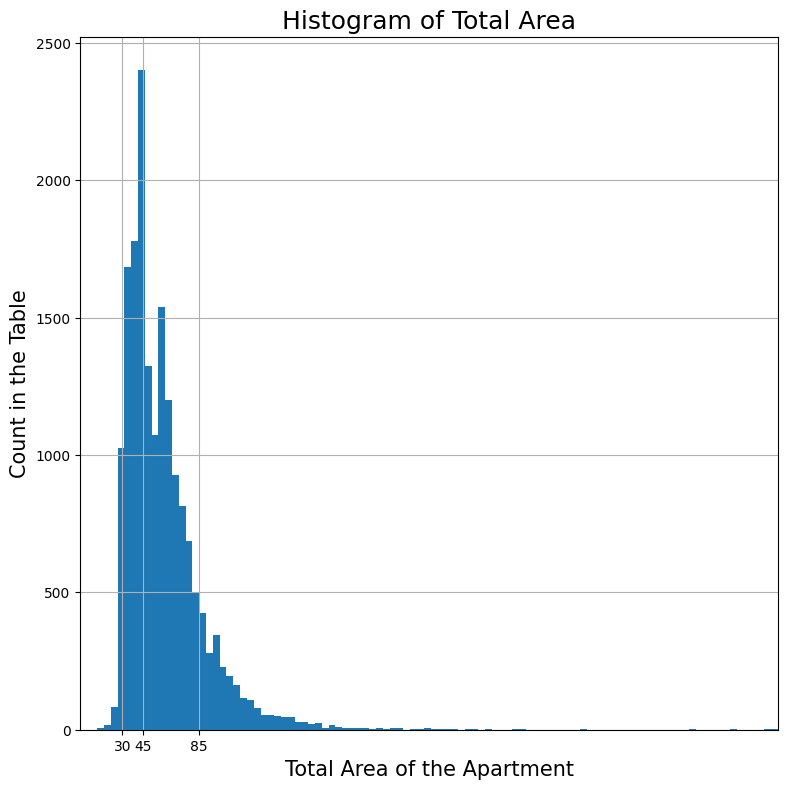

In [109]:
# Histogram for the total area of the apartment
df['total_area'].plot(kind='hist', y='total_area', bins=100, figsize=(9, 9), grid=True) 
plt.xlabel('Total Area of the Apartment', fontsize=15)
plt.ylabel('Count in the Table', fontsize=15)

# Title of the chart
plt.title('Histogram of Total Area', fontsize=18)

# Limiting the maximum area
plt.xlim([0, 500])

# Adding additional ticks for better understanding of the histogram
plt.xticks([30, 45, 85])

plt.show()


From the histogram of the total apartment area, it can be seen that most apartments have an area of 40-50 sq. m., there are many apartments with an area up to 85 sq. m., and beyond that, the histogram sharply declines. This indicates that there are not many apartments with an area of 85+ sq. m. Apartments with an area of 100+ square meters are quite rare and can be considered outliers.

To make the data more accurately represented, it's necessary to remove rare, outlier values (a small number of apartments with a very large area).

In [110]:
# checking the amount of large area flats
df.query('total_area > 120')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,locality_name_lem,sqm_price,dow,month,year,first_last,living_to_total_%,kitchen_to_total_%
3,0,64900000,159,2015-07-24,3,2.65,14,45,9,NaN,...,234.0,424.0,санкт-петербург \n,408176,4,7,2015,3,28,5
19,16,14200000,121,2019-01-09,3,2.75,16,76,8,NaN,...,NaN,97.0,санкт-петербург \n,117355,2,1,2019,3,62,9
42,13,22000000,161,2015-07-08,4,2.80,4,80,2,False,...,907.0,987.0,петергоф \n,136645,2,7,2015,3,49,10
51,7,45000000,161,2017-10-17,3,3.20,8,38,4,NaN,...,99.0,541.0,санкт-петербург \n,279503,1,10,2017,3,23,31
121,20,33000000,180,2017-02-17,3,2.90,9,86,8,False,...,NaN,144.0,санкт-петербург \n,183333,4,2,2017,3,47,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,6,11703000,126,2017-06-15,3,2.65,6,60,4,NaN,...,287.0,244.0,санкт-петербург \n,92880,3,6,2017,3,47,11
23574,14,64990000,139,2015-11-24,3,3.00,8,3,8,NaN,...,100.0,280.0,санкт-петербург \n,467553,1,11,2015,1,2,11
23600,8,8700000,132,2018-11-13,3,2.65,9,78,3,NaN,...,NaN,60.0,санкт-петербург \n,65909,1,11,2018,3,59,7
23684,20,21400000,145,2018-11-02,4,3.00,26,71,17,NaN,...,NaN,NaN,санкт-петербург \n,147586,4,11,2018,3,48,10


The quantity is not very large (~1%), so I am removing this data.

In [111]:
df = df.drop(df[df.total_area >= 120].index)

And checking the result.

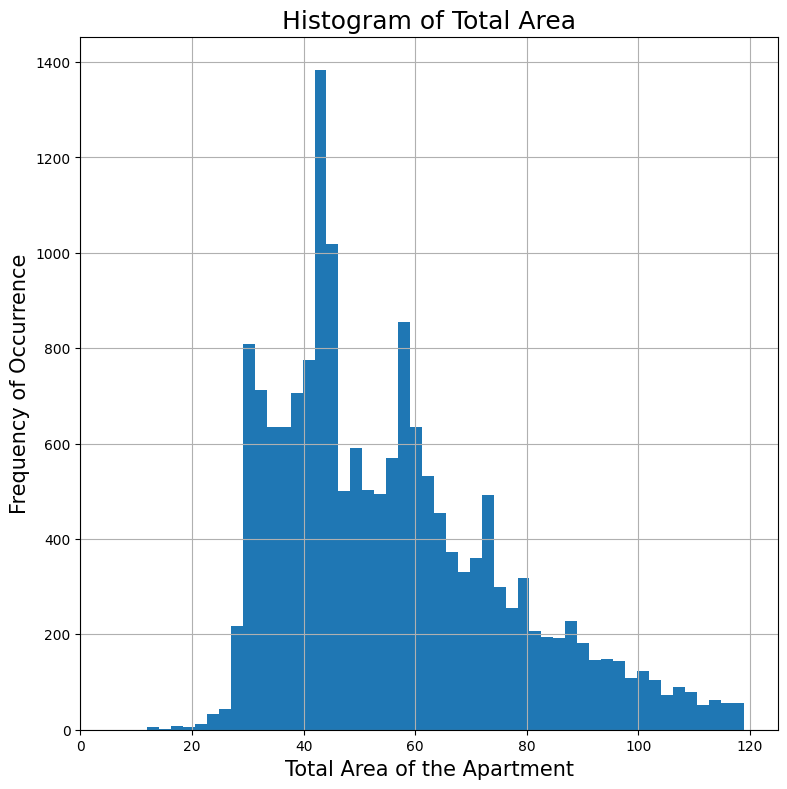

In [112]:
# Histogram for the total area of the apartment
df['total_area'].plot(kind='hist', y='total_area', bins=50, figsize=(9, 9), grid=True)
plt.xlabel('Total Area of the Apartment', fontsize=15)
plt.ylabel('Frequency of Occurrence', fontsize=15)

# Title of the chart
plt.title('Histogram of Total Area', fontsize=18)

# Limiting the maximum area
plt.xlim([0, 125])

plt.show()


From the histogram, it can be seen that the market mostly consists of apartments with an area of 40-45 sq. m.

The histogram of prices looks as follows:

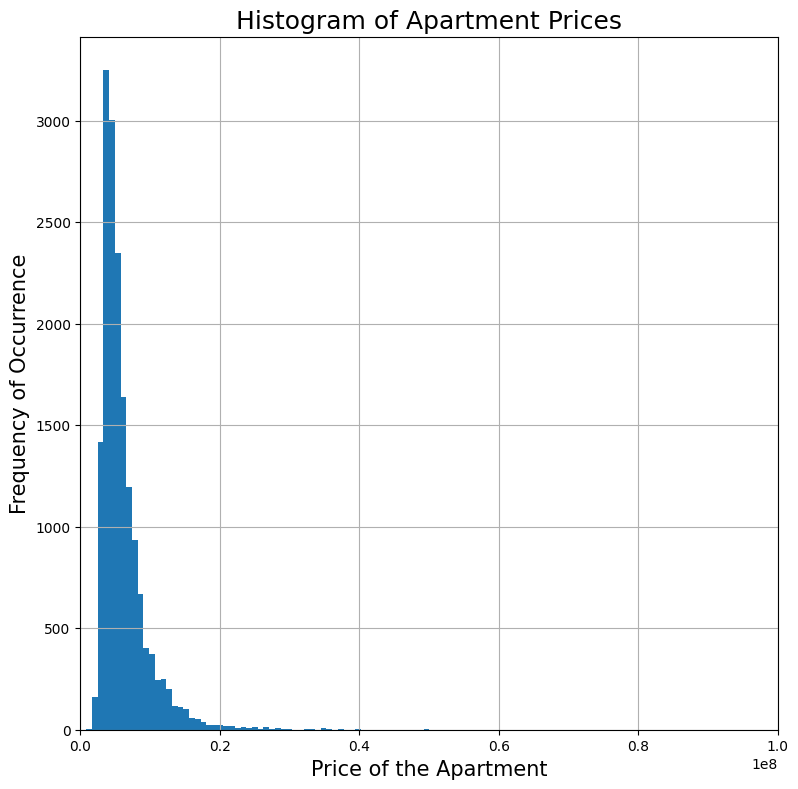

In [113]:
# Histogram of apartment prices
df['last_price'].plot(kind='hist', x='last_price', bins=100, figsize=(9, 9), grid=True)
plt.xlabel('Price of the Apartment', fontsize=15)
plt.ylabel('Frequency of Occurrence', fontsize=15)

# Title of the chart
plt.title('Histogram of Apartment Prices', fontsize=18)

# Limiting the maximum price
plt.xlim([0, 100000000])

plt.show()



The cost varies greatly, the histogram has a very long right tail, indicating that the table contains quite a few rare values in the high price category.

I'm checking how many rows in the table have a price of more than 20000000 (as seen as a threshold value on the histogram).

In [114]:
# checking the high price amount
df.query('last_price > 20000000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,locality_name_lem,sqm_price,dow,month,year,first_last,living_to_total_%,kitchen_to_total_%
239,16,22000000,119,2017-02-16,3,3.50,5,56,3,False,...,86.0,77.0,санкт-петербург \n,184873,3,2,2017,3,47,29
276,5,23900000,108,2018-11-15,3,3.06,7,45,6,NaN,...,678.0,96.0,санкт-петербург \n,221296,3,11,2018,3,41,8
282,17,37000000,115,2018-11-15,2,2.65,5,65,2,NaN,...,663.0,158.0,санкт-петербург \n,321739,3,11,2018,3,56,12
379,14,21000000,96,2017-02-07,2,3.00,7,20,1,NaN,...,418.0,153.0,санкт-петербург \n,218750,1,2,2017,2,20,37
605,12,22000000,110,2017-01-23,2,3.20,5,66,4,False,...,571.0,287.0,санкт-петербург \n,200000,0,1,2017,3,60,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22948,10,34500000,100,2018-06-26,3,2.65,7,34,3,NaN,...,NaN,NaN,санкт-петербург \n,345000,1,6,2018,3,34,34
23060,13,20990000,100,2018-09-12,3,2.65,25,45,14,NaN,...,NaN,90.0,санкт-петербург \n,209900,2,9,2018,3,45,20
23185,18,24500000,93,2017-11-01,2,3.08,3,64,2,NaN,...,678.0,346.0,санкт-петербург \n,263440,2,11,2017,3,68,23
23240,20,21800000,114,2019-04-22,3,2.75,15,64,7,NaN,...,253.0,NaN,санкт-петербург \n,191228,0,4,2019,3,56,20


Approximately 0.8%. This is not a lot, so I am removing these values.

In [115]:
# removing extras
df = df.drop(df[df.last_price >= 20000000].index)



And checking the result.

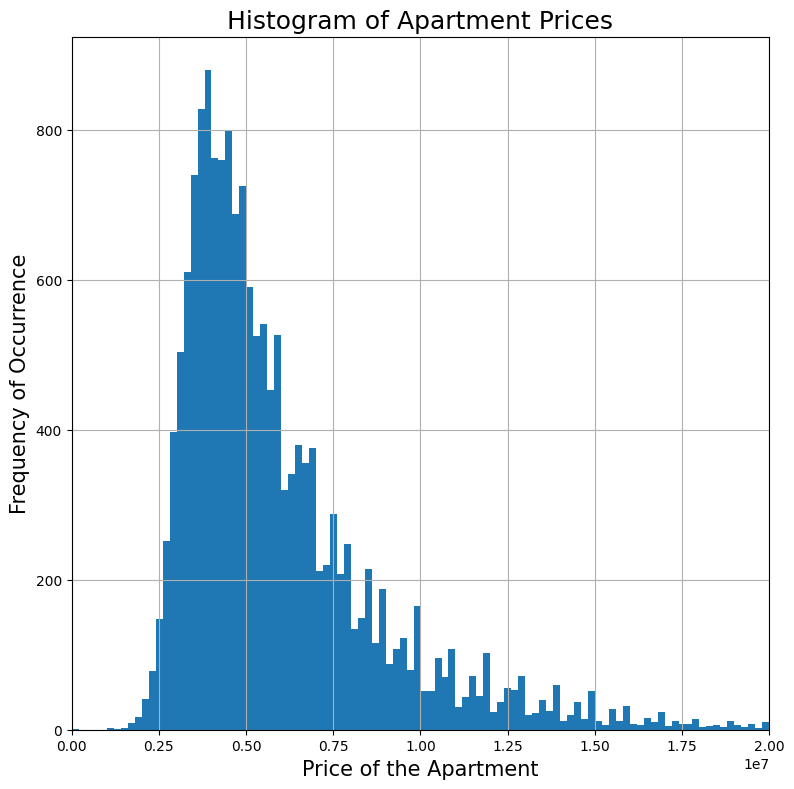

In [116]:
# Histogram of apartment prices
df['last_price'].plot(kind='hist', x='last_price', bins=100, figsize=(9, 9), grid=True)
plt.xlabel('Price of the Apartment', fontsize=15)
plt.ylabel('Frequency of Occurrence', fontsize=15)

# Title of the chart
plt.title('Histogram of Apartment Prices', fontsize=18)

# Limiting the maximum price
plt.xlim([0, 20000000])

plt.show()


From the histogram, it can be seen that the market mostly consists of apartments priced around 3 million rubles.

The histogram of the number of rooms looks as follows:

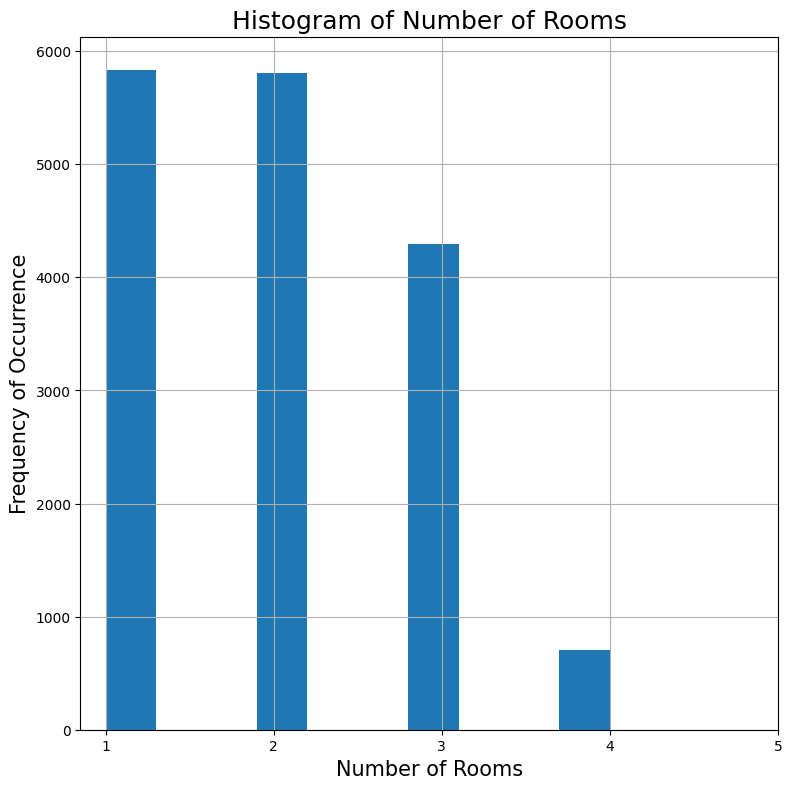

In [117]:
# Histogram of number of rooms
df['rooms'].plot(kind='hist', x='rooms', bins=10, figsize=(9, 9), grid=True)
plt.xlabel('Number of Rooms', fontsize=15)
plt.ylabel('Frequency of Occurrence', fontsize=15)

# Title of the chart
plt.title('Histogram of Number of Rooms', fontsize=18)

# Adding additional ticks for better understanding of the histogram
plt.xticks([1, 2, 3, 4, 5])

plt.show()

From the histogram, it can be seen that most apartments have 1-2 rooms. Anything less than 1 or more than 4 is rare and can be considered as outliers.

The histogram of ceiling height looks as follows:

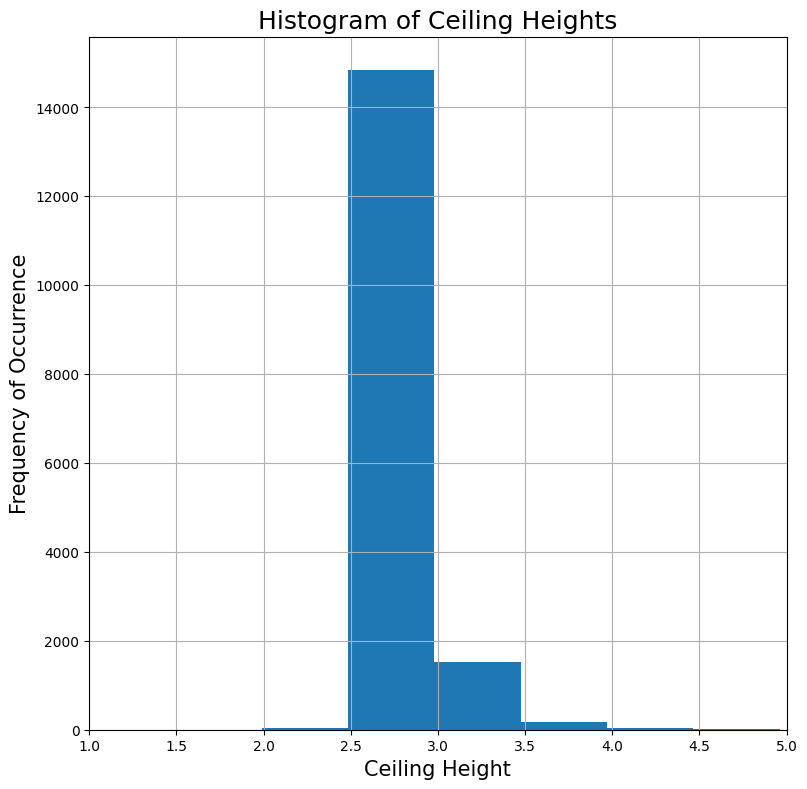

In [118]:
# Histogram for the ceiling height of apartments
df['ceiling_height'].plot(kind='hist', x='ceiling_height', bins=200, figsize=(9, 9), grid=True)
plt.xlabel('Ceiling Height', fontsize=15)
plt.ylabel('Frequency of Occurrence', fontsize=15)

# Title of the chart
plt.title('Histogram of Ceiling Heights', fontsize=18)

# Limiting the maximum ceiling height
plt.xlim([1, 5])

plt.show()



Primarily, the ceiling height does not exceed 3.5 meters.

Let's study the time it takes to sell an apartment, starting with calculating the mean and median to understand how quickly an apartment is sold.

In [119]:
# selling mean
df['days_exposition'].mean()

175.02814118288362

In [120]:
# selling median
df['days_exposition'].median()

92.0

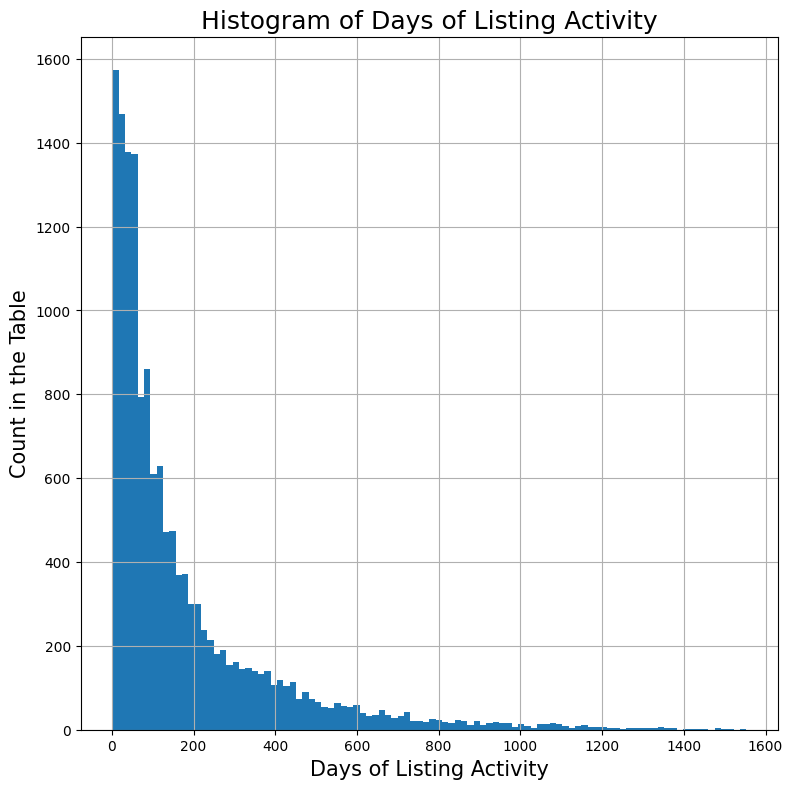

In [121]:
# Histogram of the duration of the listing activity
df['days_exposition'].plot(kind='hist', x='days_exposition', bins=100, figsize=(9, 9), grid=True)
plt.xlabel('Days of Listing Activity', fontsize=15)
plt.ylabel('Count in the Table', fontsize=15)

# Title of the chart
plt.title('Histogram of Days of Listing Activity', fontsize=18)

plt.show()



If we believe the median, then selling a house on average takes 95 days. This contradicts the histogram data - the histogram shows that the maximum number of houses was sold within 50 days.

I will remove rare and outlier values.

In [122]:
# checking the number outliers
df.query('days_exposition > 800')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,locality_name_lem,sqm_price,dow,month,year,first_last,living_to_total_%,kitchen_to_total_%
98,11,11700000,80,2014-12-10,3,2.65,5,55,3,NaN,...,NaN,831.0,санкт-петербург \n,146250,2,12,2014,3,68,13
109,2,7497600,62,2015-12-08,2,2.65,5,35,5,NaN,...,NaN,1048.0,пушкин \n,120929,1,12,2015,1,56,14
145,6,8290000,77,2015-09-21,2,2.77,16,40,5,NaN,...,260.0,807.0,санкт-петербург \n,107662,0,9,2015,3,51,12
319,19,4850000,59,2015-03-19,3,2.50,5,47,4,NaN,...,NaN,974.0,санкт-петербург \n,82203,3,3,2015,3,79,10
330,16,7100000,50,2016-04-20,3,2.65,5,31,1,NaN,...,411.0,900.0,санкт-петербург \n,142000,2,4,2016,2,62,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23585,1,5953044,89,2015-09-03,3,2.75,23,47,17,NaN,...,624.0,939.0,санкт-петербург \n,66888,3,9,2015,3,52,17
23588,7,8100000,69,2015-10-14,2,2.65,10,31,8,NaN,...,874.0,823.0,санкт-петербург \n,117391,2,10,2015,3,44,14
23598,8,4300000,33,2016-03-29,1,2.58,20,15,6,NaN,...,NaN,971.0,санкт-петербург \n,130303,1,3,2016,3,45,24
23664,5,9000000,110,2015-12-10,4,3.36,7,64,5,NaN,...,118.0,816.0,санкт-петербург \n,81818,3,12,2015,3,58,13



There are about 3% of such ads. I will remove them and check the minimum value, as it seems to be zero based on the histogram


In [123]:
# removing outliers
df = df.drop(df[df.days_exposition >= 800].index)

In [124]:
# checking minimal values
df['days_exposition'].min()

1.0


In the left part of the histogram, ads are grouped that were posted for only one day. There are no zero values.

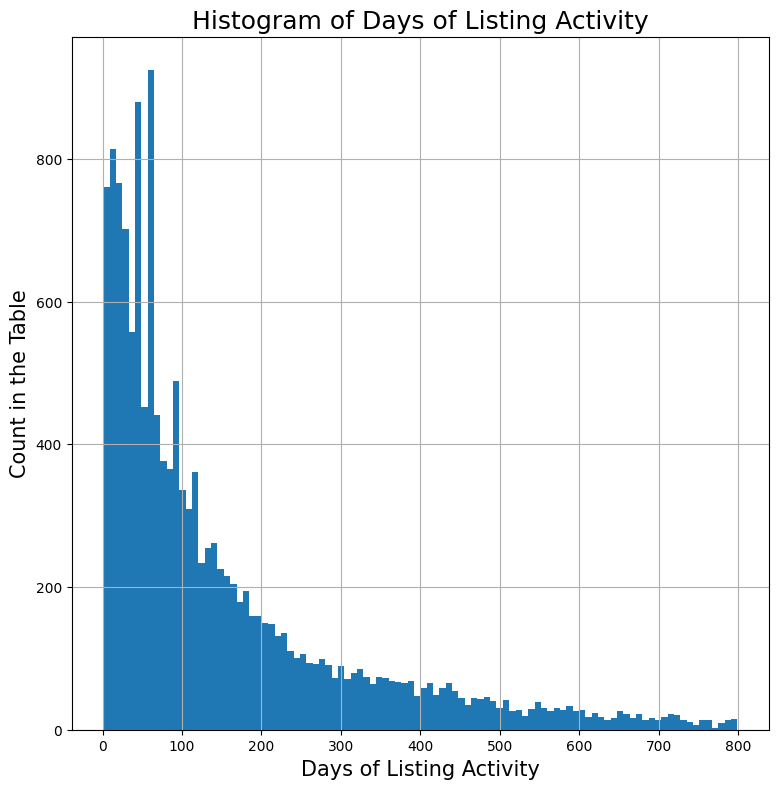

In [125]:
# Histogram of the duration of the listing activity
df['days_exposition'].plot(kind='hist', x='days_exposition', bins=100, figsize=(9, 9), grid=True)
plt.xlabel('Days of Listing Activity', fontsize=15)
plt.ylabel('Count in the Table', fontsize=15)

# Title of the chart
plt.title('Histogram of Days of Listing Activity', fontsize=18)

plt.show()

After removing some values, the histogram became easier to read. According to the histogram, the peak duration of listing activity appears to be around 60 days.

Factors affecting the price of an apartment: Does the price depend on the square meterage?






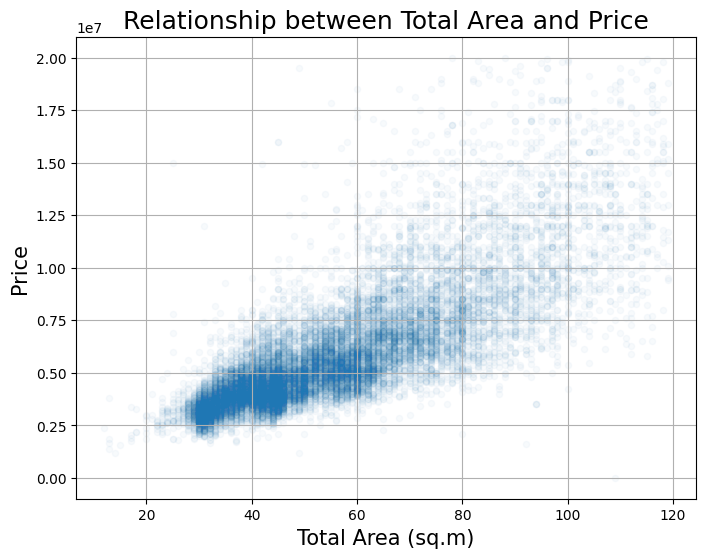

In [126]:
# Scatter plot of the relationship between total area and price
df.plot(x='total_area', y='last_price', kind='scatter', alpha=0.03, figsize=(8, 6), grid=True)
plt.xlabel('Total Area (sq.m)', fontsize=15)
plt.ylabel('Price', fontsize=15)

# Title of the chart
plt.title('Relationship between Total Area and Price', fontsize=18)

plt.show()

The chart shows that there is a correlation. All apartments with the same square meterage are located in roughly the same price category.


In [127]:
# Calculating Pearson's correlation coefficient
corr_coef = df['total_area'].corr(df['last_price'])

# Output the result with title
print('Correlation coefficient between Total Area and Price: {:.2f}'.format(corr_coef))


Correlation coefficient between Total Area and Price: 0.79



The coefficient is close to 1, which means that there is a strong dependence of the price on the square meterage of the apartment.

Factors affecting the price of an apartment: Does the price depend on the number of rooms?

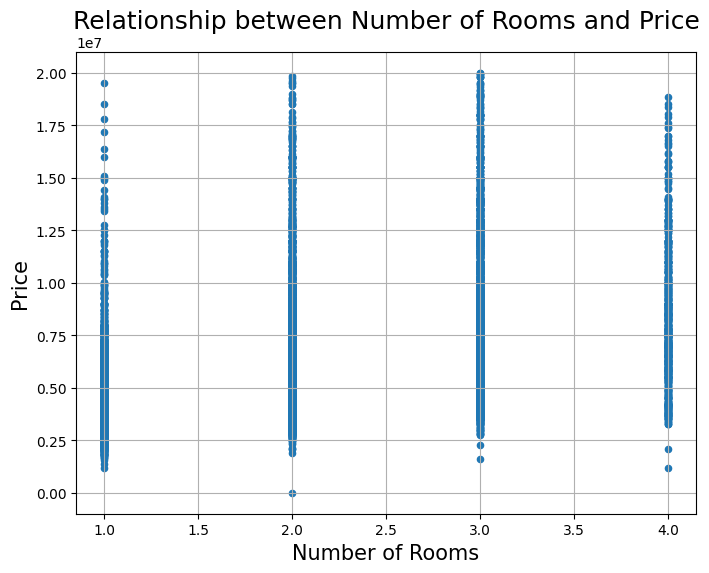

In [128]:
# Scatter plot of the relationship between number of rooms and price
df.plot(x='rooms', y='last_price', kind='scatter', figsize=(8, 6), grid=True)
plt.xlabel('Number of Rooms', fontsize=15)
plt.ylabel('Price', fontsize=15)

# Title of the chart
plt.title('Relationship between Number of Rooms and Price', fontsize=18)

plt.show()


There is no clear dependence, or it is very weak.


In [129]:
 # Calculating Pearson's correlation coefficient
corr_coef_2 = df['rooms'].corr(df['last_price'])

# Output the result with title
print('Correlation coefficient between Number of Rooms and Price: {:.2f}'.format(corr_coef_2))

Correlation coefficient between Number of Rooms and Price: 0.48


I see the price depending on the floor. The categories of floors located on the x-axis are:

1. first
2. last
3. other

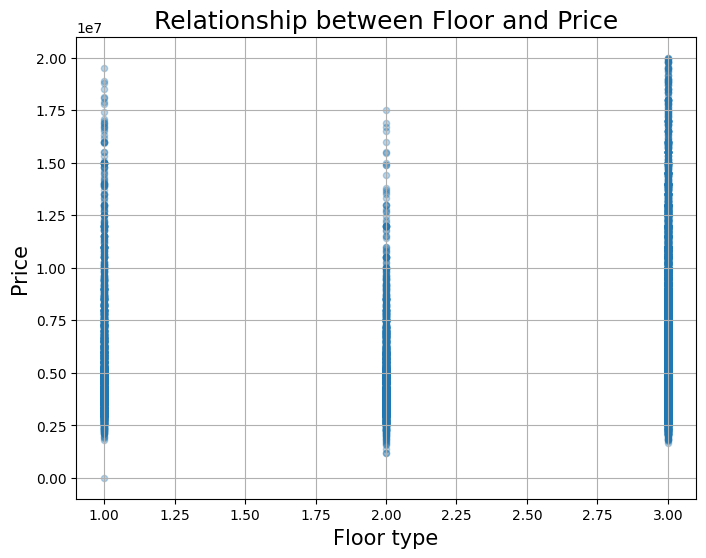

In [130]:
# scatterplot of price depending on floor type
df.plot(x='first_last', y='last_price', kind='scatter', alpha=0.3, figsize=(8, 6), grid=True)
plt.xlabel('Floor type', fontsize=15)
plt.ylabel('Price', fontsize=15)

# Title of the chart
plt.title('Relationship between Floor and Price', fontsize=18)

plt.show()




There appears to be no evident correlation.

In [131]:
#  Calculating Pearson's correlation coefficient
corr_coef_3 = df['first_last'].corr(df['last_price'])

# Output the result with title
print('Correlation coefficient between Number of Floor and Price: {:.2f}'.format(corr_coef_3))

Correlation coefficient between Number of Floor and Price: 0.06


There is no correlation between the price and the floor, as confirmed by both the scatter plot and the correlation coefficient.

Factors that affect the price of an apartment: does the price depend on the distance from the city center?

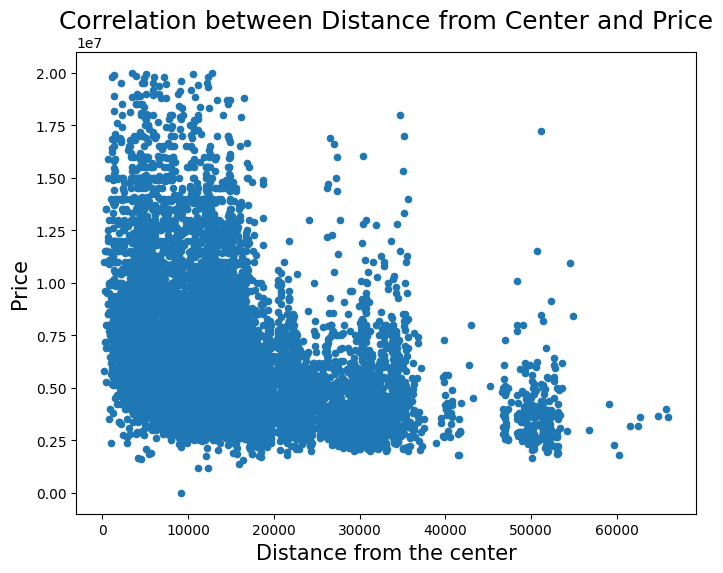

In [132]:
# setting plot size and grid
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid(True)

# plot data with labels and title
df.plot(ax=ax, x='cityCenters_nearest', y='last_price', kind='scatter')
ax.set_xlabel('Distance from the center', fontsize=15)
ax.set_ylabel('Price', fontsize=15)
ax.set_title('Correlation between Distance from Center and Price', fontsize=18)

plt.show()


The diagram indicates that there is some dependence - the closer to the city center, the more expensive the apartment.

In [133]:
#  Calculating Pearson's correlation coefficient
corr_coef_4 = df['cityCenters_nearest'].corr(df['last_price'])

# Output the result with title
print('Correlation between Distance from Center and Price: {:.2f}'.format(corr_coef_4))

Correlation between Distance from Center and Price: -0.35


Based on the coefficient, there is indeed a dependence, but it is weak. I believe that the presence of numerous settlements where the parameter of proximity to the city center is not specified affects the correlation. In this case, it would be better to analyze each settlement separately.


Factors influencing the apartment price: Does the price depend on the listing date, including the day of the week, month, and year?

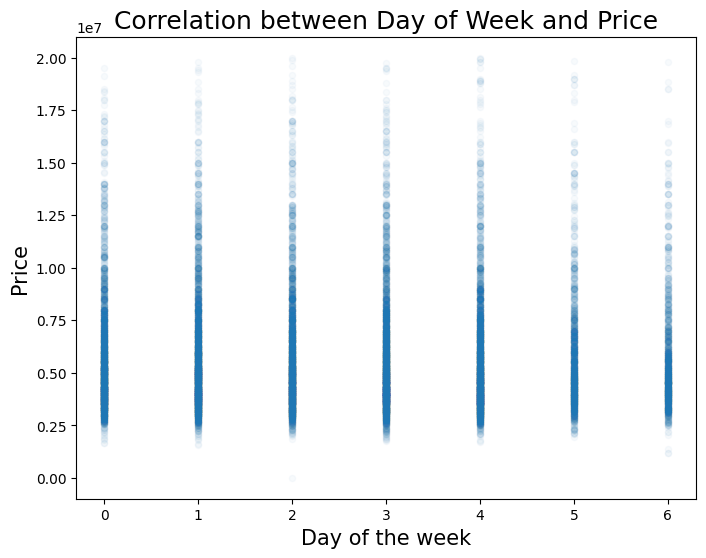

In [134]:
# setting plot size and grid
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid(True)

# plot data with labels and title
df.plot(ax=ax, x='dow', y='last_price', kind='scatter', alpha=0.03)
ax.set_xlabel('Day of the week', fontsize=15)
ax.set_ylabel('Price', fontsize=15)
ax.set_title('Correlation between Day of Week and Price', fontsize=18)

plt.show()



The diagram does not show a pronounced dependence.

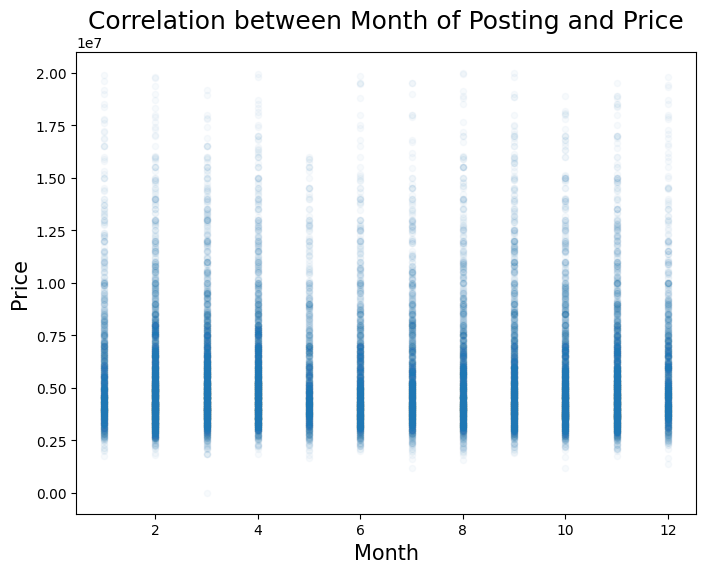

In [135]:
# setting plot size and grid
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid(True)

# plot data with labels and title
df.plot(ax=ax, x='month', y='last_price', kind='scatter', alpha=0.03)
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Price', fontsize=15)
ax.set_title('Correlation between Month of Posting and Price', fontsize=18)

plt.show()


No correlation so far.

In [136]:
#  Calculating Pearson's correlation coefficient
corr_coef_5 = df['year'].corr(df['last_price'])

# Output the result with title
print('Сorrelation between Month of Posting and Price: {:.2f}'.format(corr_coef_5))



Сorrelation between Month of Posting and Price: 0.02



The coefficient confirms that there is no dependence on the price. The only thing that can be seen is that there has been an increase in the number of apartments for sale since 2015.

We will select the top 10 populated areas with the highest number of listings.

In [137]:
# 10 populated areas with the highest number of listings
df['locality_name_lem'].value_counts().head(10)

санкт-петербург \n    13896
   шушары \n            423
пушкин \n               336
колпино \n              330
   парголовый \n        316
петергоф \n             190
красный    \n           170
сестрорецк \n           166
ломоносов \n            122
кронштадт \n             92
Name: locality_name_lem, dtype: int64

Let's calculate the average price of the square meter.

In [138]:
# average square meter price for top 10
(df
    .query('(locality_name_lem == "санкт-петербург \\n") or (locality_name_lem == "   шушар \\n") or (locality_name_lem == "пушкин \\n") or (locality_name_lem == "колпино \\n") or (locality_name_lem == "   парголовый \\n") or (locality_name_lem == "петергоф \\n") or (locality_name_lem == "красный    \\n") or (locality_name_lem == "ломоносов \\n") or (locality_name_lem == "кронштадт \\n") or (locality_name_lem == "сестрорецк \\n")')
    .pivot_table(index='locality_name_lem', values='sqm_price', aggfunc=['count','mean'])
)


,count,mean
,sqm_price,sqm_price
locality_name_lem,,
парголовый \n,316,90820.613924
колпино \n,330,75652.833333
красный \n,170,72648.029412
кронштадт \n,92,79758.032609
ломоносов \n,122,73577.745902
петергоф \n,190,84945.642105
пушкин \n,336,102214.684524
санкт-петербург \n,13896,109232.063903


The highest housing cost is in Saint Petersburg. The lowest is in Krasnoye Selo.

We select all the apartments from Saint Petersburg and take a slice based on them.

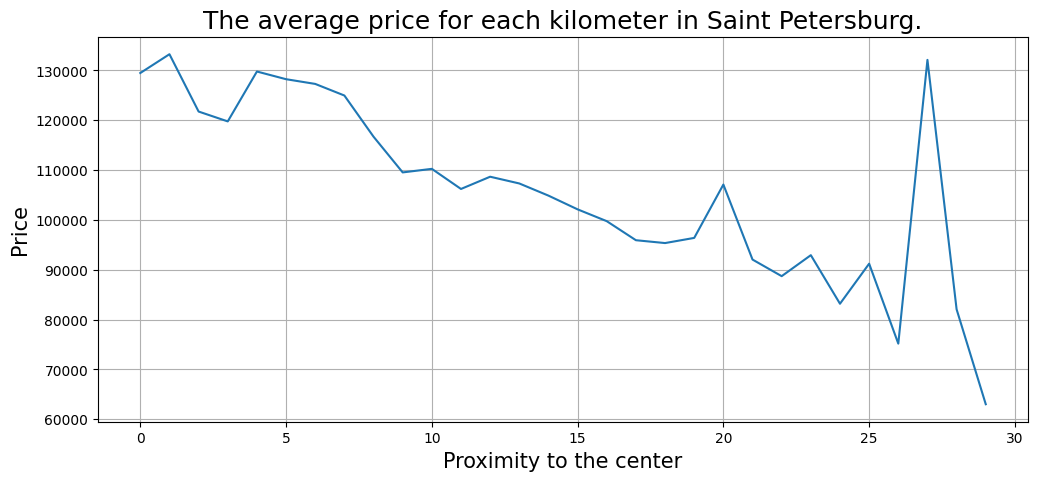

In [139]:
# average price for each kilometer in Saint Petersburg
df['cityCenters_nearest_km'] = (df['cityCenters_nearest']/1000).astype(int)

# plot data
df['cityCenters_nearest_km'] = df['cityCenters_nearest']/1000
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].astype(int)

(df
    .query('locality_name_lem == "санкт-петербург \\n"')
    .groupby('cityCenters_nearest_km')['sqm_price'].mean()
    .plot(grid=True, figsize=(12,5))
)
plt.xlabel('Proximity to the center', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.title('The average price for each kilometer in Saint Petersburg.', fontsize=18)

plt.show()


The graph shows a noticeable change at the 8-10 km mark, probably indicating the boundary where the city center ends and other districts begin.

I am selecting apartments from the center of Saint Petersburg.

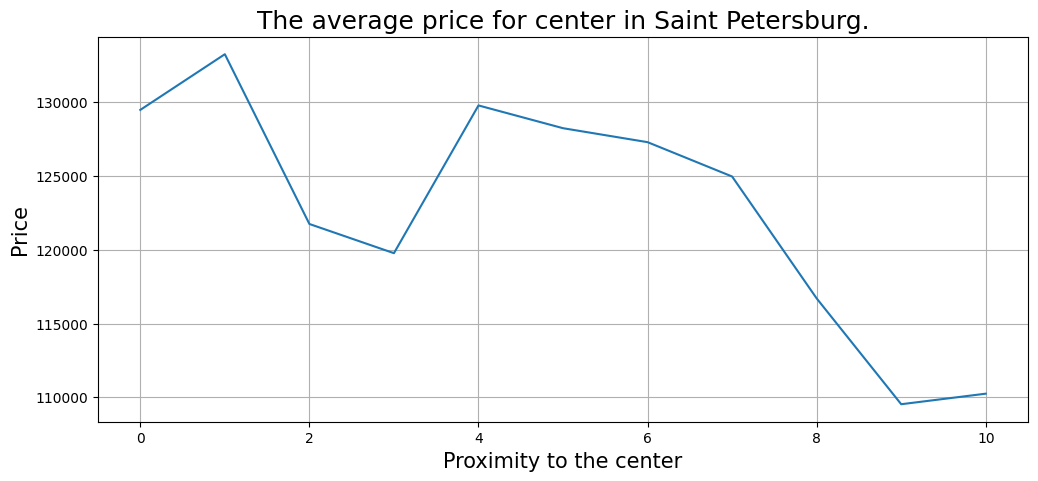

In [140]:
# spb center graph
(df
    .query('(locality_name_lem == "санкт-петербург \\n") and (cityCenters_nearest_km <= 10)')
    .groupby('cityCenters_nearest_km')['sqm_price'].mean()
    .plot(grid=True, figsize=(12,5))
)
plt.xlabel('Proximity to the center', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.title('The average price for center in Saint Petersburg.', fontsize=18)
plt.show()

Mostly, prices are within 130,000 per sq. m., and they sharply decline starting from a distance of ~9 km.

Other data for Saint Petersburg:

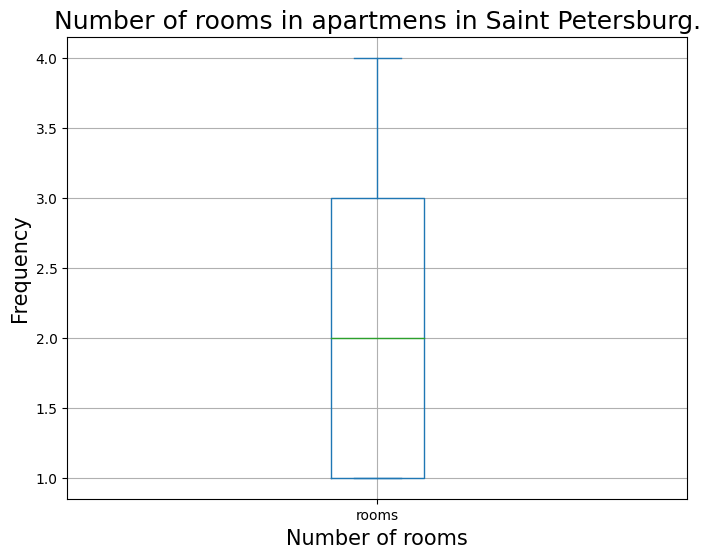

In [141]:
# number of rooms in SPB apartments
(df
    .query('(locality_name_lem == "санкт-петербург \\n")')
    ['rooms'].plot(kind='box', figsize=(8, 6), grid=True)
)

plt.xlabel('Number of rooms', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Number of rooms in apartmens in Saint Petersburg.', fontsize=18)

plt.show()



I used a box plot (it provides a clearer view of outliers). It is evident that the majority of apartments have 1 to 3 rooms, with the median being 2 rooms. There are outliers in the form of 4-room apartments.

(1.0, 5.0)

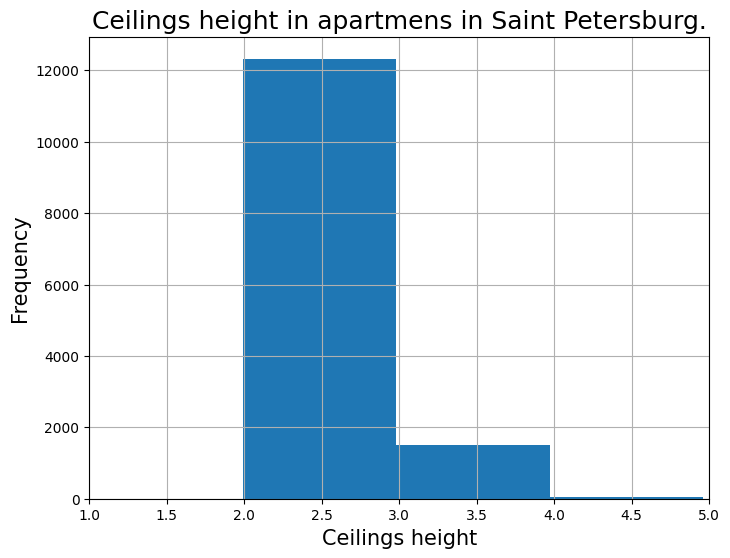

In [142]:
# ceilings height in apt in SPB
(df
    .query('locality_name_lem == "санкт-петербург \\n"')
    ['ceiling_height'].plot(kind='hist', bins=100, figsize=(8, 6), grid=True)
)

plt.xlabel('Ceilings height', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Ceilings height in apartmens in Saint Petersburg.', fontsize=18)

plt.xlim([1, 5])

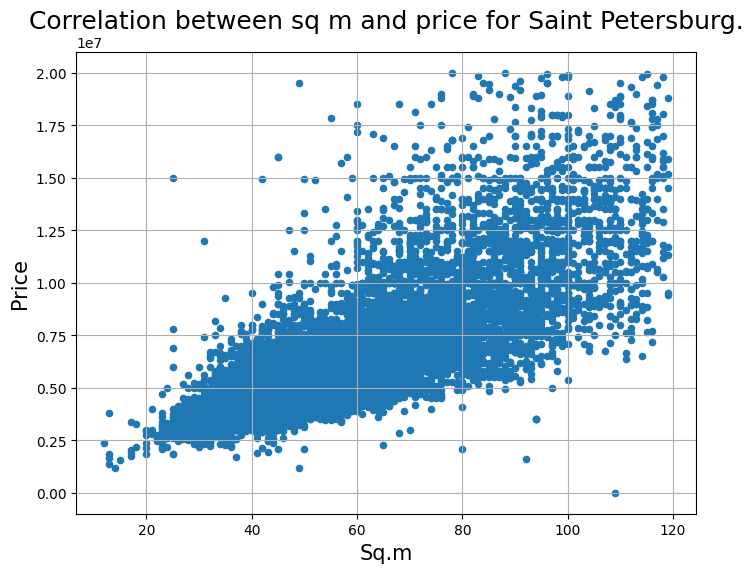

In [143]:
# correlation between sq m and price for SPb
(df
    .query('locality_name_lem == "санкт-петербург \\n"')
    .plot(x='total_area', y='last_price', kind='scatter', figsize=(8, 6), grid=True)
)

plt.xlabel('Sq.m', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.title('Correlation between sq m and price for Saint Petersburg.', fontsize=18)
plt.show()

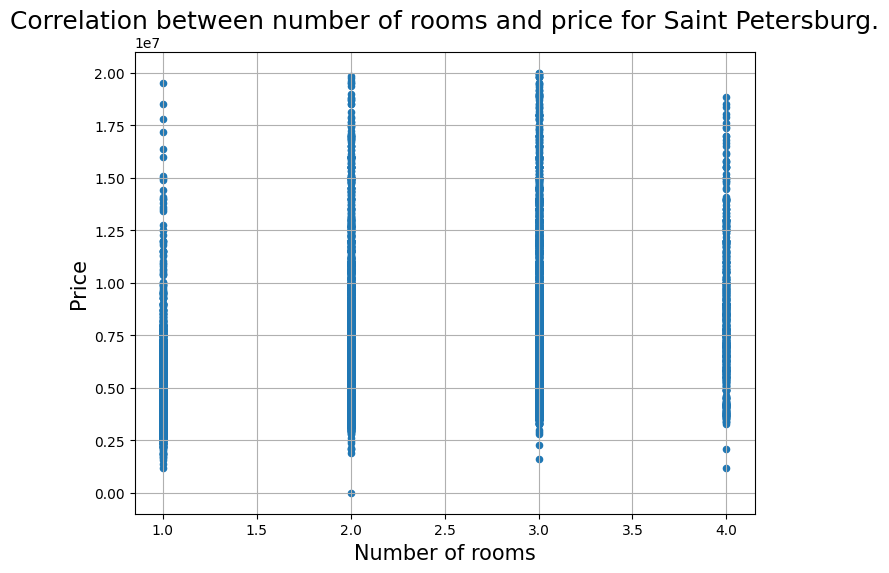

In [144]:
# correlation between number of rooms and price for SPb
(df
    .query('locality_name_lem == "санкт-петербург \\n"')
    .plot(x='rooms', y='last_price', kind='scatter', figsize=(8, 6), grid=True)
)

plt.xlabel('Number of rooms', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.title('Correlation between number of rooms and price for Saint Petersburg.', fontsize=18)
plt.show()

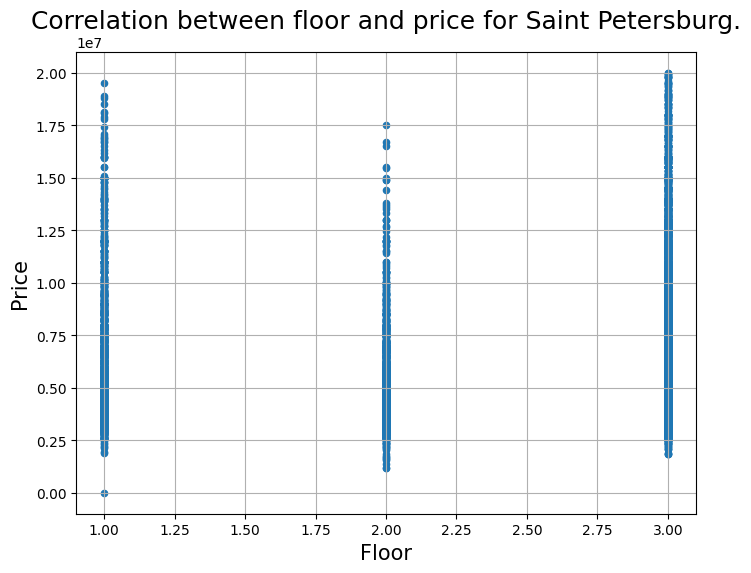

In [145]:
# correlation between  floor and price for SPb
(df
    .query('locality_name_lem == "санкт-петербург \\n"')
    .plot(x='first_last', y='last_price', kind='scatter', figsize=(8, 6), grid=True)
)

plt.xlabel('Floor', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.title('Correlation between floor and price for Saint Petersburg.', fontsize=18)
plt.show()

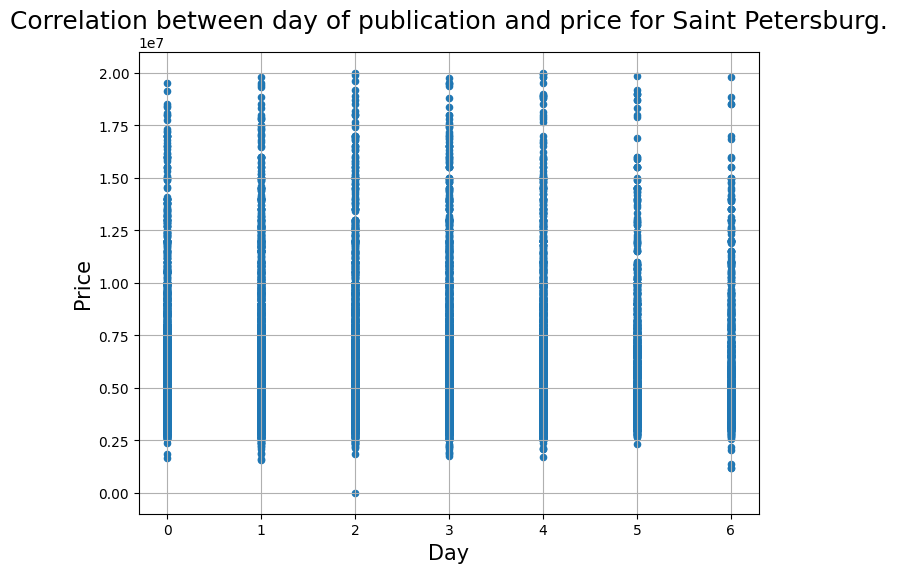

In [146]:
# correlation between publication day and price for SPB
(df
    .query('locality_name_lem == "санкт-петербург \\n"')
    .plot(x='dow', y='last_price', kind='scatter', figsize=(8, 6), grid=True)
)

plt.xlabel('Day', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.title('Correlation between day of publication and price for Saint Petersburg.', fontsize=18)
plt.show()

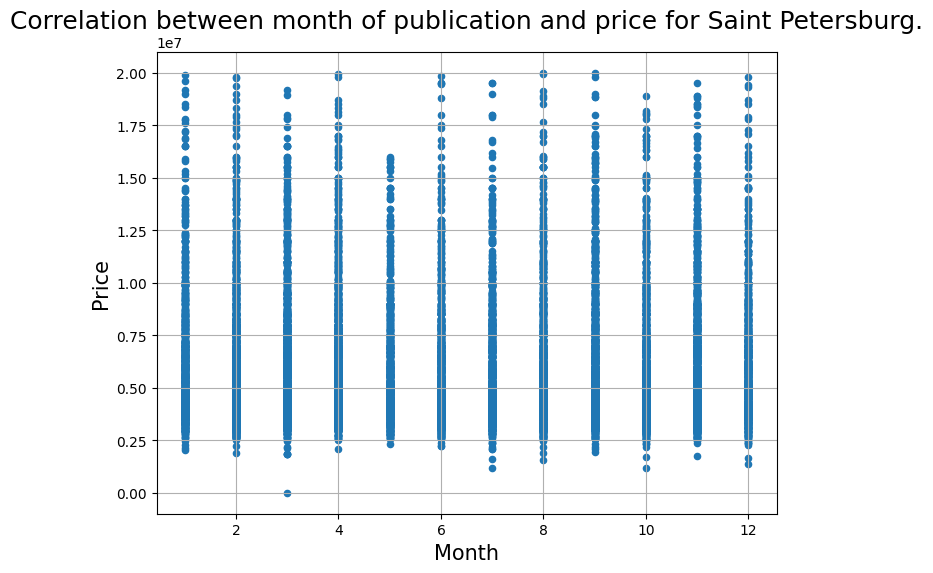

In [147]:
# correlation between publication month and price for SPB
(df
    .query('locality_name_lem == "санкт-петербург \\n"')
    .plot(x='month', y='last_price', kind='scatter', figsize=(8, 6), grid=True)
)

plt.xlabel('Month', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.title('Correlation between month of publication and price for Saint Petersburg.', fontsize=18)
plt.show()

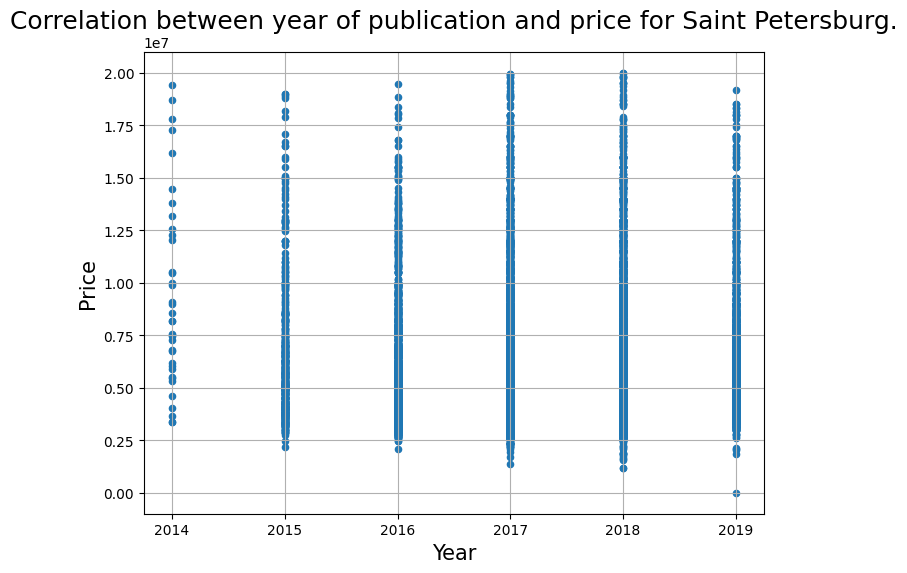

In [148]:
# correlation between publication year and price for SPB
(df
    .query('locality_name_lem == "санкт-петербург \\n"')
    .plot(x='year', y='last_price', kind='scatter', figsize=(8, 6), grid=True)
)

plt.xlabel('Year', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.title('Correlation between year of publication and price for Saint Petersburg.', fontsize=18)
plt.show()

# Conclusions

Data analysis was conducted to determine the factors influencing apartment prices. The analysis was based on advertisements for the sale of apartments in Saint Petersburg and the Leningrad region.

The following statements apply to all regions:

* The market is dominated by standard one- and two-bedroom apartments with an average area of 40-50 square meters and standard ceiling height.
* Sales usually occur within 60 days.
* Price strongly correlates with the size of the apartment, with a Pearson coefficient of approximately 0.7.
* To a lesser extent, the proximity to the city center affects the apartment price, with a Pearson coefficient of approximately 0.5. This dependency is applicable only to cities.
* Apartment prices do not depend on ceiling height, floor level, publication date, or day, etc.
